In [74]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

iris = load_iris()
X,y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf = clf.fit(X, y)

<module 'sklearn.tree' from '/home/kilo/.cache/pypoetry/virtualenvs/xlemoo-6BFI3yUJ-py3.8/lib/python3.8/site-packages/sklearn/tree/__init__.py'>

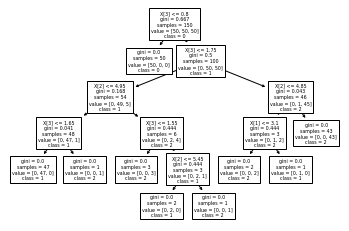

In [79]:
tree.plot_tree(clf, class_names=["0", "1", "2"])
tree

In [76]:
clf.tree_.children_right[2]
clf.tree_.weighted_n_node_samples

array([150.,  50., 100.,  54.,  46.,  48.,   6.,  47.,   1.,   3.,   3.,
         2.,   1.,   3.,  43.,   2.,   1.])

In [80]:
def find_all_paths(tree):
    paths = []
    
    def traverse_tree(tree, rules: list, node_id: int):
        # check if current node is a leaf, if true, do not recurse
        if tree.tree_.children_left[node_id] == tree.tree_.children_right[node_id]:
            # find classificaiton
            classification = np.argmax(tree.tree_.value[node_id])
            entry = {}
            entry["rules"] = rules
            entry["samples"] = tree.tree_.weighted_n_node_samples[node_id]
            entry["impurity"] = tree.tree_.impurity[node_id]
            entry["classification"] = classification
            paths.append(entry)

        # is root? if root, then new path begins
        elif node_id == 0:
            threshold = tree.tree_.threshold[node_id]
            feature = tree.tree_.feature[node_id]
            rule_left = [feature, "lte", threshold]
            rule_right = [feature, "gt", threshold]

            left_id = tree.tree_.children_left[node_id]
            right_id = tree.tree_.children_right[node_id]

            # go left and right
            left_rules = [rule_left]
            right_rules = [rule_right]
            
            traverse_tree(tree, left_rules, left_id)
            traverse_tree(tree, right_rules, right_id)
            
        # we have a node
        else:
            threshold = tree.tree_.threshold[node_id]
            feature = tree.tree_.feature[node_id]
            rule_left = [feature, "lte", threshold]
            rule_right = [feature, "gt", threshold]

            left_id = tree.tree_.children_left[node_id]
            right_id = tree.tree_.children_right[node_id]
                     
            left_rules = rules + [rule_left]
            right_rules = rules + [rule_right]
            
            traverse_tree(tree, left_rules, left_id)
            traverse_tree(tree, right_rules, right_id)
            
    traverse_tree(tree, [], 0)
    
    return paths

In [81]:
paths = find_all_paths(clf)

for path in paths:
    print(path)

{'rules': [[3, 'lte', 0.800000011920929]], 'samples': 50.0, 'impurity': 0.0, 'classification': 0}
{'rules': [[3, 'gt', 0.800000011920929], [3, 'lte', 1.75], [2, 'lte', 4.950000047683716], [3, 'lte', 1.6500000357627869]], 'samples': 47.0, 'impurity': 0.0, 'classification': 1}
{'rules': [[3, 'gt', 0.800000011920929], [3, 'lte', 1.75], [2, 'lte', 4.950000047683716], [3, 'gt', 1.6500000357627869]], 'samples': 1.0, 'impurity': 0.0, 'classification': 2}
{'rules': [[3, 'gt', 0.800000011920929], [3, 'lte', 1.75], [2, 'gt', 4.950000047683716], [3, 'lte', 1.550000011920929]], 'samples': 3.0, 'impurity': 0.0, 'classification': 2}
{'rules': [[3, 'gt', 0.800000011920929], [3, 'lte', 1.75], [2, 'gt', 4.950000047683716], [3, 'gt', 1.550000011920929], [2, 'lte', 5.450000047683716]], 'samples': 2.0, 'impurity': 0.0, 'classification': 1}
{'rules': [[3, 'gt', 0.800000011920929], [3, 'lte', 1.75], [2, 'gt', 4.950000047683716], [3, 'gt', 1.550000011920929], [2, 'gt', 5.450000047683716]], 'samples': 1.0, 'i